# Analyzing Tennis Player Data


### Name: Catherine Hu



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
df = pd.read_csv('edited_players.csv')
print(df.shape)
df.columns

(1388, 9)


Index(['player_id', 'years_since_pro', 'turned_pro', 'height_cm', 'weight_kg',
       'birth_year', 'age', 'handedness', 'backhand'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 9 columns):
player_id          1388 non-null object
years_since_pro    1388 non-null int64
turned_pro         1388 non-null int64
height_cm          1352 non-null float64
weight_kg          1360 non-null float64
birth_year         1378 non-null float64
age                1388 non-null int64
handedness         561 non-null object
backhand           561 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 97.7+ KB


In [4]:
df = df.drop(['turned_pro', 'birth_year'], axis=1)

In [5]:
df.head()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
0,g077,74,188.0,82.0,92,NaN,NaN
1,d133,60,183.0,72.0,84,NaN,NaN
2,g075,60,185.0,89.0,83,NaN,NaN
3,r071,56,175.0,77.0,74,R,One
4,g076,55,188.0,82.0,78,NaN,NaN


In [89]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,1388.000000,1352.000000,1360.000000,1388.000000
mean,23.281700,184.199704,78.743382,56.828530
std,9.833321,9.589274,6.608212,167.616746
min,3.000000,0.000000,57.000000,20.000000
25%,16.000000,180.000000,75.000000,35.000000
50%,23.000000,185.000000,78.500000,42.000000
75%,30.000000,188.000000,83.000000,50.000000
max,74.000000,211.000000,108.000000,2020.000000


In [90]:
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()

In [91]:
print(df.isnull().sum())
df = df.dropna()  
print(df.isnull().sum()) 


player_id            0
years_since_pro      0
height_cm           36
weight_kg           28
age                  0
handedness         827
backhand           827
dtype: int64
player_id          0
years_since_pro    0
height_cm          0
weight_kg          0
age                0
handedness         0
backhand           0
dtype: int64


In [92]:
print(df.shape)
indexNames = df[df['age'] >= 40 ].index
df.drop(indexNames , inplace=True)
print(df.shape)

(551, 7)
(415, 7)


In [93]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,415.000000,415.000000,415.000000,415.000000
mean,13.142169,185.889157,80.036145,31.691566
std,4.751967,6.713405,6.881758,4.751944
min,3.000000,168.000000,64.000000,20.000000
25%,9.000000,183.000000,75.000000,28.000000
50%,13.000000,185.000000,80.000000,32.000000
75%,17.000000,191.000000,84.000000,35.000000
max,23.000000,211.000000,108.000000,39.000000


In [94]:
print(df.shape)
df.columns

(415, 7)


Index(['player_id', 'years_since_pro', 'height_cm', 'weight_kg', 'age',
       'handedness', 'backhand'],
      dtype='object')

In [95]:
df.head()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
686,l397,23,185.0,73.0,39,L,One
712,v254,23,183.0,73.0,39,R,One
723,d362,22,188.0,88.0,39,R,One
731,f324,22,185.0,85.0,39,R,One
740,h432,22,178.0,77.0,39,R,Two


In [96]:
df.tail()

,player_id,years_since_pro,height_cm,weight_kg,age,handedness,backhand
1383,te51,4,193.0,83.0,22,R,One
1384,tf58,4,170.0,68.0,23,R,Two
1385,e865,3,201.0,82.0,24,R,One
1386,kd35,3,188.0,75.0,25,R,Two
1387,n771,3,188.0,80.0,25,L,Two


In [97]:
df.describe()

,years_since_pro,height_cm,weight_kg,age
count,415.000000,415.000000,415.000000,415.000000
mean,13.142169,185.889157,80.036145,31.691566
std,4.751967,6.713405,6.881758,4.751944
min,3.000000,168.000000,64.000000,20.000000
25%,9.000000,183.000000,75.000000,28.000000
50%,13.000000,185.000000,80.000000,32.000000
75%,17.000000,191.000000,84.000000,35.000000
max,23.000000,211.000000,108.000000,39.000000


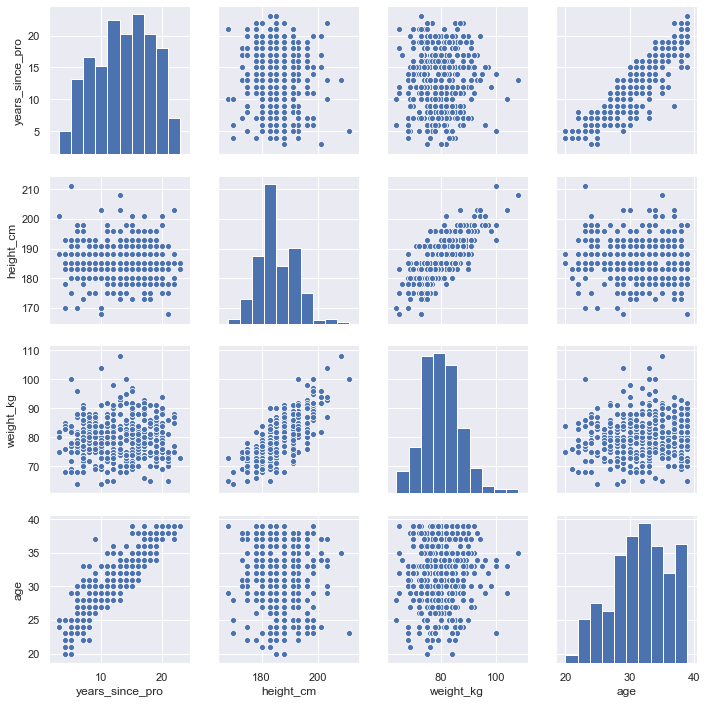

In [98]:
sns.pairplot(df)

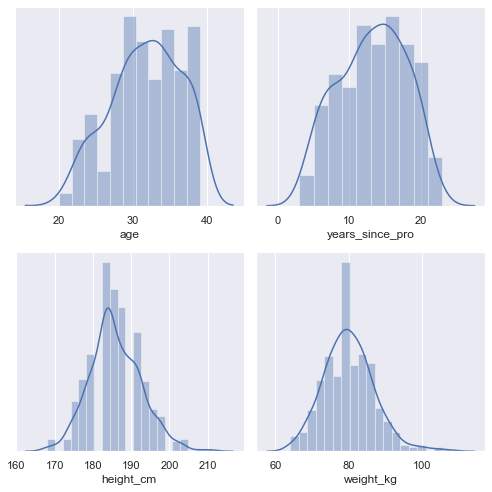

In [108]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))


sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['years_since_pro'], ax=axes[0,1])
sns.distplot(df['height_cm'], ax=axes[1,0])
sns.distplot(df['weight_kg'], ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

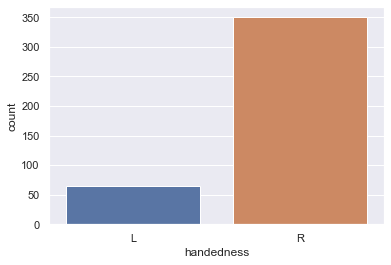

In [99]:
# Visualize categorical data
sns.countplot(df['handedness'], data = df)

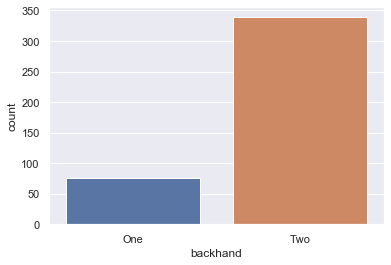

In [100]:
# Visualize categorical data
sns.countplot(df['backhand'], data = df)

In [ ]:
bxplt = sns.boxplot(x = 'handedness', y = 'height_cm', data = df )

In [114]:
# Simple linear regression with line of best fit and error
sns.regplot(x = 'height_cm', y = "weight_kg", data = df)

TypeError: regplot() got an unexpected keyword argument 'hue'

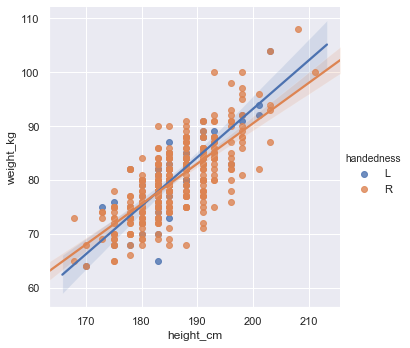

In [115]:
sns.lmplot(x = 'height_cm', y = "weight_kg", data = df, hue = 'handedness')

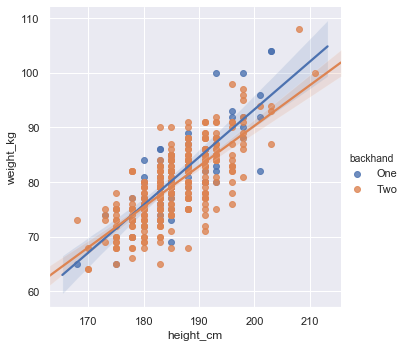

In [116]:
sns.lmplot(x = 'height_cm', y = "weight_kg", data = df, hue = 'backhand')

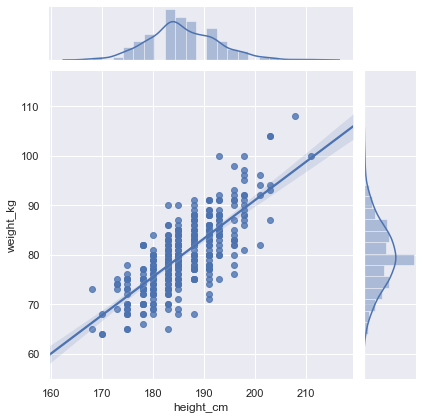

In [110]:
# Linear reg plot plus pdfs from before
sns.jointplot(x = 'height_cm', y = "weight_kg", data = df, kind = 'reg')

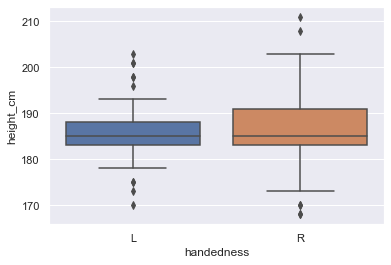

In [112]:
sns.boxplot(x = 'handedness', y = 'height_cm', data = df)

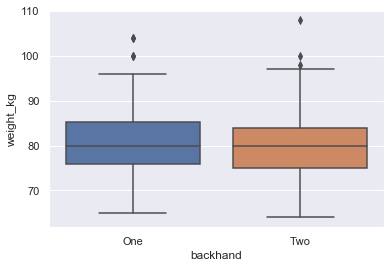

In [113]:
sns.boxplot(x = 'backhand', y = 'weight_kg', data = df)

In [ ]:
# Rename
# df = df.rename(columns={"Engine Fuel Type" : "Fuel Type", "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
# df.head(5)


In [ ]:
df.columns

## Q3. (4 pts)  Identify which car is the most expensive and which one is the least expensive? If there are more than one type of car with the same price, pick one, also provide the price. 

In [ ]:


df[df['Price'] == df['Price'].max()]







In [ ]:
cheap = df[df['Price'] == df['Price'].min()]
cheap['Year'].max()

In [ ]:
df[(df['Price'] == df['Price'].min()) & (df['Year'] == 2000)]

## Q4. (8 pts) Compare Toyota RAV4 and Honda CRV's average price, which one is more expensive? 

In [ ]:
Toyota =  df[df["Make"]=="Toyota"]
Honda =  df[df["Make"]=="Honda"]

rav4 = Toyota[Toyota["Model"] == "RAV4"]
print(rav4["Price"].mean())

hon = Honda[Honda["Model"] == "CR-V"]
print(hon["Price"].mean())




## Q5. (2 pts) How many different types of Honda cars are there? 

In [ ]:
Honda['Model'].unique()








In [ ]:
Honda['Model'].nunique()


## Q6. (2 pts) What's the average price of 2016 Honda CR-V

In [ ]:

Honda[(Honda['Model'] == "CR-V") & (Honda['Year'] == 2016)]['Price'].mean()








## Q7 (4 pts) What's the most expensive price of 2017 FIAT with the lowest MPG-C? 

In [ ]:


FIAT = df[(df['Year'] == 2017) & (df['Make'] == 'FIAT')]
FIAT[FIAT["MPG-C"] == FIAT["MPG-C"].min()]['Price'].max()





## Q8 (3 pts) Plot a bar chart of the top 10 total number of cars manufactured by each company, title your chart: Number of Cars by Make

In [ ]:
df.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');




## Q9 (3 pts) Plot a bar chart of the top 10 total number of cars manufactured each year, title your chart: Number of Cars by Year

In [ ]:
df.Year.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by year")
plt.ylabel('Number of cars')
plt.xlabel('Year');






## Q10 (3 pts bonus) Sarah wants to buy a car from the list. She wants the newest all wheel drive automatic BMW with MPG-H greater than or equal to 40, what options does she have?   

In [ ]:
new_year = df["Year"].max()


df[(df['Transmission'] == 'AUTOMATIC') & (df['Year'] == new_year) & (df['Make'] == "BMW") & (df['Drive Mode'] == "all wheel drive") 
  & (df['MPG-H'] >= 40 )]



